<a href="https://colab.research.google.com/github/hsargoli/MyWorks/blob/main/MLalgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


```
 I have tried to design some machine learning algorithms in this file. with numpy

```

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# linear regression
------

mean x , mean y 	 3.0 2.8


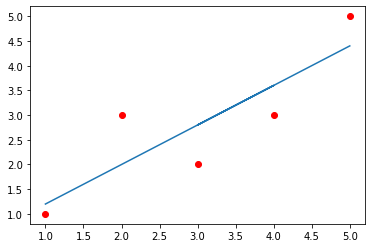

	predicted y:[1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]
	true y:[1, 3, 3, 2, 5]
+ error (mean distance from y ):  0.692820323027551


In [2]:
xx = [1, 2, 4, 3, 5]
yy = [1, 3, 3, 2, 5]


def meang(data):
    ins_num = len(data)
    ins_sum = sum(data)
    res = ins_sum / ins_num
    return res


meanX = meang(xx)
meanY = meang(yy)
print("mean x , mean y \t", meanX, meanY)
#  y = b0 + b1*x
#  b1 = sum((xi-mean) -( yi - mean))/sum ((xi-mean)**2)
def simple_linear_regression(x, y):
    """
    if y depend on one x
    """
    meanX = meang(x)
    meanY = meang(y)
    s0 = []
    s1 = []
    for i in range(len(x)):
        sorat = (x[i] - meanX) * (y[i] - meanY)
        makhraj = (x[i] - meanX) ** 2
        s0.append(sorat)
        s1.append(makhraj)
    b1res = sum(s0) / sum(s1)
    b0res = meanY - (b1res * meanX)
    resy = []
    for i in range(len(x)):
        a = b0res + (b1res * x[i])
        resy.append(a)
    plt.plot(x, resy)
    plt.scatter(x, y, color="r")

    plt.show()
    return resy


yp = simple_linear_regression(xx, yy)
print("\tpredicted y:{}\n\ttrue y:{}".format(yp, yy))


def Rmse(yd, yp):
    n = len(yp)
    b = []
    for i in range(n):
        a = (yp[i] - yd[i]) ** 2
        b.append(a)
    c = sum(b)
    d = np.sqrt(c / n)
    return d


# shortcut for find B1
# b1=np.corrcoef(xx,yy)[1][0]*(np.std(yy)/np.std(xx))

if __name__ == "__main__":
    print("+ error (mean distance from y ): ", Rmse(yy, yp))


# Gradient descent 
----------

In [3]:
# y=b0+ b1*x
# for 1st of yy and xx

xx = [1, 2, 3, 4, 5]
yy = [4, 6, 12, 13, 15]


def GD(initweight, index):
    """
    update weights based on input index to minimize error
     initweight :
         initial weight, What weight does it start with?
     index : 
         wich index optimized
    """
    init_weight = initweight
    yyp = init_weight[0] + init_weight[1] * xx[index]
    err = yyp - yy[index]
    for i in range(500):  # range ( iteration )
        # print(init_weight)
        learning_rate = 0.01
        init_weight[0] = init_weight[0] - (err * learning_rate)
        init_weight[1] = init_weight[1] - (
            err * learning_rate * xx[index]
        )  # error naghsh gradian ro dare
        # dar asl bayad moshtagh martabe 1 taabe baashe
        yyp = init_weight[0] + init_weight[1] * xx[index]
        err = yyp - yy[index]

    return init_weight


def predictor(x, y, w):
    resy = []
    for i in range(len(x)):
        yyp = w[0] + w[1] * x[i]
        resy.append(yyp)
    for i, j in zip(y, resy):
        print(f"true y: {i}", f"\tpredicted y: {j}")
    return resy


def present(init_w, xdata, ydata):
    errs = []
    for i in range(len(xdata)):
        wn = GD(init_w, i)
        print(
            "index {} -> {} is Picked for gradient descent.".format(i,xdata[i]),
            f"\nResulting weights: {wn}",
            sep="\t",
        )
        basd = predictor(xdata, ydata, wn)
        err = Rmse(ydata, basd)
        errs.append(err)
        print("\nroot mean squared error (RMSE) : ", err)
        print(" =--------= ")
    print(f"minimum errors is {min(errs)} with index {errs.index(min(errs))}")


present([0, 0], xx, yy)


index 0 -> 1 is Picked for gradient descent.	
Resulting weights: [1.9999179520297095, 1.9999179520297095]
true y: 4 	predicted y: 3.999835904059419
true y: 6 	predicted y: 5.999753856089129
true y: 12 	predicted y: 7.999671808118838
true y: 13 	predicted y: 9.999589760148547
true y: 15 	predicted y: 11.999507712178257

root mean squared error (RMSE) :  2.6079893138951595
 =--------= 
index 1 -> 2 is Picked for gradient descent.	
Resulting weights: [1.999967180811881, 2.0000164095940542]
true y: 4 	predicted y: 3.999983590405935
true y: 6 	predicted y: 5.999999999999989
true y: 12 	predicted y: 8.000016409594044
true y: 13 	predicted y: 10.000032819188098
true y: 15 	predicted y: 12.000049228782151

root mean squared error (RMSE) :  2.6076570495164915
 =--------= 
index 2 -> 3 is Picked for gradient descent.	
Resulting weights: [2.3999655398524737, 3.2000114867158396]
true y: 4 	predicted y: 5.599977026568313
true y: 6 	predicted y: 8.799988513284152
true y: 12 	predicted y: 11.99999999

# Logistic regression
---------

pair of true y and predicted y [(0, 0), (0, 0), (0, 1), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] 
accuracy : 	 0.8
predicted weights: [-4.796845513410336, 3.0585129423343567, -0.6594791980104654]


Text(0.5, 1.0, 'predicted!')

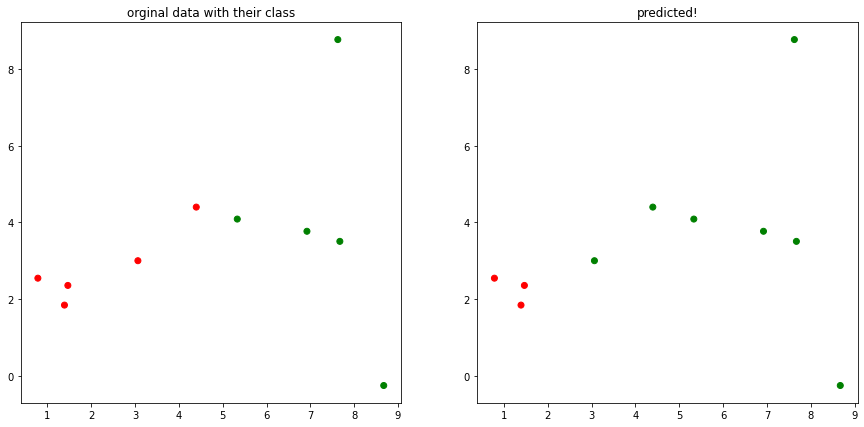

In [7]:
import random

X = np.array(
    [
        [0.7810836, 2.550537003, 0],
        [1.465489372, 2.362125076, 0],
        [4.396561688, 4.400293529, 0],
        [1.38807019, 1.850220317, 0],
        [3.06407232, 3.005305973, 0],
        [7.627531214, 8.759262235, 1],
        [5.332441248, 4.088626775, 1],
        [6.922596716, 3.77106367, 1],
        [8.675418651, -0.242068655, 1],
        [7.673756466, 3.508563011, 1],
    ]
)
x1, x2, y = X[:, 0], X[:, 1], X[:, 2]
a = np.ones(len(x2))
Xd = np.array(list(zip(x1, x2)))

y = [int(x) for x in y]
colormap = np.array(["r", "g"])

fig = plt.figure(figsize = (15,7))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(x1, x2, color=colormap[y])
ax1.set_title('orginal data with their class')

class LR:
    def __init__(self):
        pass

    def sigmoid(self, w, x): 
        res = w[0] + (np.dot(w[1:], x))  # w0 is the bias, w1 till end is multiple weights
        out = 1 / (1 + np.exp(-res))
        return out 

    def updater2(self, w, alpha, y, ypred, x):
        wnew = []
        for i in range(len(w)):
            if i == 0:  #
                w1 = w[i] + alpha * (y - ypred) * ypred * (1 - ypred) * 1
                wnew.append(w1)
            elif i >= 1:
                w1 = (
                    w[i] + alpha * (y - ypred) * x[(i - 1)]
                )  # (y-ypred) * ypred * (1-ypred)* x[(i-1)]
                wnew.append(w1)
        return wnew

    def updater(self, w, alpha, y, ypred, x):
        w1 = w[0] + alpha * (y - ypred) * ypred * (1 - ypred) * 1
        w2 = w[1] + alpha * (y - ypred) * ypred * (1 - ypred) * x[0]
        w3 = w[2] + alpha * (y - ypred) * ypred * (1 - ypred) * x[1]
        wnew = list([w1, w2, w3])
        return wnew

    def doo(self, inw, x, y, ite, lr): # do gradient descent and sigmoid function Continually
        t = 0
        w = inw
        while t < ite:
            random_index = random.randint(0, 9)
            res = self.sigmoid(w, x[random_index])
            w = self.updater2(w, lr, y[random_index], res, x[random_index])
            t += 1
        return w

    def predicter(self, w, x, y):  # for Highlighting accuracy of algorithm
        sto = []
        for i in x:
            a = self.sigmoid(w, i)
            sto.append(a)
        res = []
        for i in sto:
            if i >= 0.5:
                i = 1
                res.append(i)
            elif i < 0.5:
                i = 0
                res.append(i)
        acc = [(i, j) for i, j in zip(y, res)]
        score = 0
        for i, j in acc:
            if i == j:
                score += 1
        print(f'pair of true y and predicted y {acc}', "\naccuracy : \t", score / len(x))
        return res

    def present(self, index, initweight, x, y, iteration, LR):
        inw = initweight
        www = self.doo(initweight, x, y, iteration, LR)
        self.predicter(www, x, y)
        print("weights : ", www)


sg = LR()
inw = [0, 0, 0]
www = sg.doo(inw, Xd, y, 2000, .2)  
#                                             sg.predicter(www,Xd,y)
ynew = sg.predicter(www, Xd, y)
print(f'predicted weights: {www}')
ax2 = fig.add_subplot(1,2,2); ax2.scatter(x1,x2,color=colormap[ynew]); ax2.set_title('predicted!')

# Linear Discriminant Analysis
---------------
calculate mean and variance for each class


Logistic Regression is one of the most popular linear classification models that perform well for binary classification but falls short in the case of multiple classification problems with well-separated classes. While LDA handles these quite efficiently.

LDA can also be used in data preprocessing to reduce the number of features just as PCA(Principal component analysis) which reduces the computing cost significantly.

LDA is also used in face detection algorithms. In Fisherfaces LDA is used to extract useful data from different faces. Coupled with eigenfaces it produces effective results.

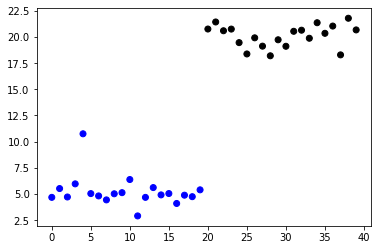

In [8]:
import numpy as np

# Load and feature map of data
data = [
    [4.667797637, 0],
    [5.509198779, 0],
    [4.702791608, 0],
    [5.956706641, 0],
    [10.738622413, 0],
    [5.027283325, 0],
    [4.805434058, 0],
    [4.425689143, 0],
    [5.009368635, 0],
    [5.116718815, 0],
    [6.370917709, 0],
    [2.895041947, 0],
    [4.666842365, 0],
    [5.602154638, 0],
    [4.902797978, 0],
    [5.032652964, 0],
    [4.083972925, 0],
    [4.875524106, 0],
    [4.732801047, 0],
    [5.385993407, 0],
    [20.74393514, 1],
    [21.41752855, 1],
    [20.57924186, 1],
    [20.7386947, 1],
    [19.44605384, 1],
    [18.36360265, 1],
    [19.90363232, 1],
    [19.10870851, 1],
    [18.18787593, 1],
    [19.71767611, 1],
    [19.09629027, 1],
    [20.52741312, 1],
    [20.63205608, 1],
    [19.86218119, 1],
    [21.34670569, 1],
    [20.333906, 1],
    [21.02714855, 1],
    [18.27536089, 1],
    [21.77371156, 1],
    [20.65953546, 1],
]
data = np.array(data)
xdata = data[:, 0]
ydata = data[:, 1]
y = [int(i) for i in ydata]
colormap = np.array(["b", "k"])
plt.scatter(range(len(xdata)), xdata, color=colormap[y])
plt.show()
class1 = []
class2 = []
# seperating each class into c1 and c2
for i in range(len(xdata)):
    if ydata[i] == 0:
        class1.append(xdata[i])
    elif ydata[i] == 1:
        class2.append(xdata[i])
c1, c2 = np.array(class1), np.array(class2)
meanC1, meanC2 = np.mean(c1), np.mean(c2)
classprobability = [
    y.count(1) / len(y),
    y.count(0) / len(y),
]  # in each class how many data present


In [9]:
def SquaredDifference(data):
    mean = sum(data) / len(data)
    a = [(i - mean) ** 2 for i in data]
    a = sum(a)
    return a


def variance(SD, Nclass, Ninstance):
    return 1 / (Ninstance - Nclass) * SD


SDC1, SDC2 = SquaredDifference(c1), SquaredDifference(c2)
SDT = SDC1 + SDC2
var = variance(SDT, 2, len(xdata))
# ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
import math


def LdA(x, mean, var, classProbability):
    a = x * (mean / var) - ((mean) ** 2 / (var * 2)) + math.log(classProbability)
    return a


def predict(x, mean1, mean2, var, classProbability):
    sto = []
    for i in x:

        a = LdA(i, mean1, var, classprobability[0])
        b = LdA(i, mean2, var, classprobability[1])
        sto.append([a, b])
    res = []
    for i, j in sto:
        a = 0 if i > j else 1
        res.append(a)
    return res


yp = predict(xdata, meanC1, meanC2, var, classprobability[0])


def acc(Ty, Py):
    ss = 0
    A = []
    for i in range(len(Ty)):
        A.append([Ty[i], Py[i]])
        if Ty[i] == Py[i]:
            ss += 1
    print(f"pair of True y and Predicte y {A}", "\nacc", ss / len(y))


acc(y, yp)


pair of True y and Predicte y [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]] 
acc 1.0


# `NonLinear algorithms`
 nonparametric
 

# CART 
---------

epoch 0
	gini = 1 
epoch 1
	gini = 1 
epoch 2
gini value 0.49382716049382713
{'left': [0], 'right': [0, 0, 0, 0, 1, 1, 1, 1, 1]}
epoch 3
gini value 0.40816326530612246
{'left': [0, 0, 0], 'right': [0, 0, 1, 1, 1, 1, 1]}
epoch 4
gini value 0.0
{'left': [0, 0, 0, 0, 0], 'right': [1, 1, 1, 1, 1]}
epoch 5
gini value 0.0
{'left': [0, 0, 0, 0, 0], 'right': [1, 1, 1, 1, 1]}
epoch 6
gini value 0.0
{'left': [0, 0, 0, 0, 0], 'right': [1, 1, 1, 1, 1]}
epoch 7
gini value 0.2777777777777778
{'left': [0, 0, 0, 0, 0, 1], 'right': [1, 1, 1, 1]}
epoch 8
gini value 0.46875
{'left': [0, 0, 0, 0, 0, 1, 1, 1], 'right': [1, 1]}
epoch 9
gini value 0.46875
{'left': [0, 0, 0, 0, 0, 1, 1, 1], 'right': [1, 1]}


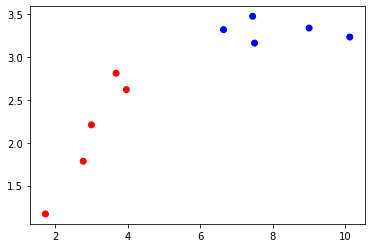

In [13]:

data = [
    [2.771244718, 1.784783929, 0],
    [1.728571309, 1.169761413, 0],
    [3.678319846, 2.81281357, 0],
    [3.961043357, 2.61995032, 0],
    [2.999208922, 2.209014212, 0],
    [7.497545867, 3.162953546, 1],
    [9.00220326, 3.339047188, 1],
    [7.444542326, 3.476683375, 1],
    [10.12493903, 3.234550982, 1],
    [6.642287351, 3.319983761, 1],
]
data = np.array(data)
xdata = data[:, :2]
ydata = data[:, 2]
ydata = [int(i) for i in ydata]
colormap = np.array(["r", "b"])
plt.scatter(xdata[:, 0], xdata[:, 1], color=colormap[ydata])

def spliter(data, sp, y):
    navi = {"left": [], "right": []}
    for i in range(len(data)):
        if data[i] >= sp:
            navi["right"].append(y[i])
        elif data[i] < sp:
            navi["left"].append(y[i])
    if len(navi["left"]) != 0 and len(navi["right"]) != 0:
        left_class1 = navi["left"].count(1) / len(navi["left"])
        left_class2 = 1 - left_class1
        right_class1 = navi["right"].count(1) / len(navi["right"])
        right_class2 = 1 - right_class1
        gini = (
            left_class1 * (1 - left_class1)
            + right_class1 * (1 - right_class1)
            + left_class2 * (1 - left_class2)
            + right_class2 * (1 - right_class2)
        )
        print("gini value {}".format(gini), navi, sep="\n")
    else:
        print("\tgini = 1 ")
    return navi


for i in range(len(xdata)):
    print("epoch", i)
    spliter(xdata[:, 0], i, ydata)

plt.show()


# Naive bayes
----

In [4]:
with open("naive.txt") as file:
    readed_data = file.read().strip().split("\n")
    readed = [i.split(" ") for i in readed_data]
del readed[0]
b = np.array(readed)
print(" our data : \n", b, end="\n----------\n")
sto = []
for i in range(len(b)):
    for j in range(len(b[0])):
        if b[i][j] == "sunny" or b[i][j] == "working" or b[i][j] == "go-out":
            a = 1
            sto.append(a)
        elif b[i][j] == "rainy" or b[i][j] == "broken" or b[i][j] == "stay-home":
            a = 0
            sto.append(a)
sto = np.reshape(sto, (10, 3))
weather = sto[:, 0]
car = sto[:, 1]
ydata = sto[:, 2]
#  naive Bayes
# - - - - - - - - -
class NB:
    def __init__(self, classes, data1, data2):
        self.classes = classes
        self.data1 = data1
        self.data2 = data2

    def be_shart(self, dataa, term1, term2):
        """
        dataa :
            car or weather
        term 1:
            for dataa: 0 is broken or rainy   1 is working or sunny
        term 2:
            for y classes: 0 is stayHome 1 goOut
        
        """
        class_probability = list(self.classes).count(term2) / len(self.classes)
        sto1 = []
        for i in range(len(self.classes)):
            if dataa[i] == term1 and self.classes[i] == term2:
                sto1.append(i)
            # print(self.data1[i],self.data2[i],self.classes[i])
        res1 = len(sto1) / (len(self.classes) * class_probability)
        return res1

    def predict(self, att1, att2, cp):
        a1 = (
            self.be_shart(self.data1, att1, 0) * self.be_shart(self.data2, att2, 0) * cp
        )
        a2 = (
            self.be_shart(self.data1, att1, 1) * self.be_shart(self.data2, att2, 1) * cp
        )
        # print('stay home: {} , go out: {}'.format(a1,a2))
        res = "stay home" if a1 > a2 else "go out"
        return res


# be_shart(car,ydata,1,0)\
sg = NB(ydata, car, weather)

print(" o o o o o ", sg.be_shart(car, 0, 0), 'when car is broken, probability to stay home', sg.predict(1, 1, 0.5))



print("index\t,\t--ypredict--\t,\t--yorg--")
for i in range(len(car)):
    c = "stay home" if ydata[i] == 0 else "go out"
    print(i, sg.predict(car[i], weather[i], 0.5), c, sep="\t,\t")


 our data : 
 [['sunny' 'working' 'go-out']
 ['rainy' 'broken' 'go-out']
 ['sunny' 'working' 'go-out']
 ['sunny' 'working' 'go-out']
 ['sunny' 'working' 'go-out']
 ['rainy' 'broken' 'stay-home']
 ['rainy' 'broken' 'stay-home']
 ['sunny' 'working' 'stay-home']
 ['sunny' 'broken' 'stay-home']
 ['rainy' 'broken' 'stay-home']]
----------
 o o o o o  0.8 when car is broken, probability to stay home go out
index	,	--ypredict--	,	--yorg--
0	,	go out	,	go out
1	,	stay home	,	go out
2	,	go out	,	go out
3	,	go out	,	go out
4	,	go out	,	go out
5	,	stay home	,	stay home
6	,	stay home	,	stay home
7	,	go out	,	stay home
8	,	stay home	,	stay home
9	,	stay home	,	stay home


# K NEAREST NEIGHBOR

a=(xdata[0][0]-xdata[1][0])**2 
<br>
b=(xdata[0][1]-xdata[1][1])**2 <br>
np.sqrt(a+b)

In [6]:
from collections import Counter
data = [
    [2.771244718, 1.784783929, 0],
    [1.728571309, 1.169761413, 0],
    [3.678319846, 2.81281357, 0],
    [3.961043357, 2.61995032, 0],
    [2.999208922, 2.209014212, 0],
    [7.497545867, 3.162953546, 1],
    [9.00220326, 3.339047188, 1],
    [7.444542326, 3.476683375, 1],
    [10.12493903, 3.234550982, 1],
    [6.642287351, 3.319983761, 1],
]
data = np.array(data)
xdata = data[:, :2]
ydata = data[:, 2]
ydata = [int(i) for i in ydata]

def squared_diff2(data1, data2):
    a = (data1[0] - data2[0]) ** 2 + (data1[1] - data2[1]) ** 2
    return np.sqrt(a)


def knn(k, x, y, newx):
    a = [squared_diff2(x[i], newx) for i in range(len(x))]
    neighbors = {"distances": [], "class": [], "index": []}
    b = sorted(a)
    for i in range(k):
        c = b[i]
        neighbors["index"].append(a.index(c))
        neighbors["distances"].append(c)
        neighbors["class"].append(y[a.index(c)])
    print("Guessed class: ", max(Counter(neighbors["class"])))
    return neighbors


print("distance beetwen two input data", squared_diff2(xdata[1], xdata[4]))
Xnew = [7.093607318, 4.365731514]
Ynew = 1
knn(3, xdata, ydata, Xnew)


distance beetwen two input data 1.6415134248003191
Guessed class:  1


{'class': [1, 1, 1],
 'distances': [0.9558043593222012, 1.1389811567876926, 1.2687951732547045],
 'index': [7, 9, 5]}

----------
# learning vector quantizaton 
-------------

[[7.90601241 2.46899504 1.        ]
 [3.26311318 2.20124666 0.        ]]
Guessed class:  0


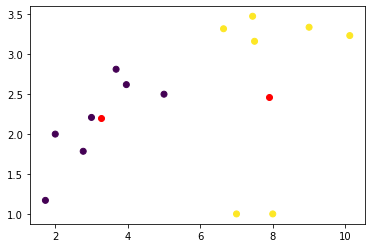

In [39]:
from collections import Counter
data = [
    [2.771244718, 1.784783929, 0],
    [1.728571309, 1.169761413, 0],
    [3.678319846, 2.81281357, 0],
    [3.961043357, 2.61995032, 0],
    [2.999208922, 2.209014212, 0],
    [7.497545867, 3.162953546, 1],
    [9.00220326, 3.339047188, 1],
    [7.444542326, 3.476683375, 1],
    [10.12493903, 3.234550982, 1],
    [6.642287351, 3.319983761, 1],
    [2,2,0],
    [7,1,1],
    [8,1,1],
    [5,2.5,0]
]
data = np.array(data)
xdata = data[:, :2]
ydata = data[:, 2]
ydata = [int(i) for i in ydata]

codeBook = np.array([[0, 0, 1], [0, 0, 0.0]])
b = []
LR = 0.1
epoch = 0
while epoch < 1000:
    for j in range(len(xdata)):
        a = [squared_diff2(xdata[j], codeBook[i]) for i in range(len(codeBook))]
        c = a.index(min(a))
        d = codeBook[c][2]
        e = data[j][2]
        for k in range(len(codeBook[0]) - 1):
            if e == d:
                codeBook[c][k] = codeBook[c][k] + (LR * (xdata[j][k] - codeBook[c][k]))
            elif e != d:
                codeBook[c][k] = codeBook[c][k] - (LR * (xdata[j][k] - codeBook[c][k]))
    epoch += 1
print(codeBook)

xnew = [3, 4]
knn(1, xdata, ydata, xnew)
plt.scatter(codeBook[:,0], codeBook[:,1],c = 'red')
plt.scatter(xdata[:,0], xdata[:,1],c=ydata)
plt.show()

[[ 2.77099464  4.9065228   1.        ]
 [ 5.50612727 -9.33326042  0.        ]
 [-0.04972765 -5.52853746  2.        ]]
Guessed class:  2


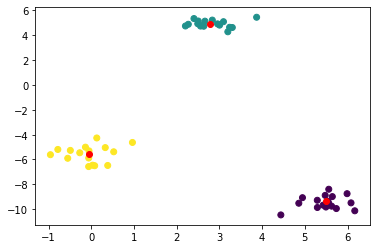

In [20]:
from sklearn.datasets import make_blobs

x2, y2 = make_blobs(n_samples = 50,
    n_features = 2,
    centers = 3,
    cluster_std = 0.5,
    shuffle = True,
    random_state = 10)
def squared_diff2(data1, data2):
    a = (data1[0] - data2[0]) ** 2 + (data1[1] - data2[1]) ** 2
    return np.sqrt(a)
plt.scatter(x2[:,0], x2[:,1],c=y2)
codeBook = np.array([[20, 10, 1], [0, 0, 0.0], [5, 0, 2]])
b = []
LR = 0.1
epoch = 0
Mepoch = 5000
while epoch < Mepoch:
    for j in range(len(x2)):
        # calculate distance from each codeBook with each x
        a = [squared_diff2(x2[j], codeBook[i]) for i in range(len(codeBook))] 
        c = a.index(min(a)) #found minimum distance for codebook
        d = codeBook[c][2] # codeBook y (class)
        e = y2[j] #True Y 
        for k in range(len(codeBook[0]) - 1):  # if nearest CodeBook neighbor has same class with it -> +  else -> - 
            if e == d: 
                codeBook[c][k] = codeBook[c][k] + (LR * (x2[j][k] - codeBook[c][k]))
            elif e != d:
                codeBook[c][k] = codeBook[c][k] - (LR * (x2[j][k] - codeBook[c][k]))
    epoch += 1
print(codeBook)

xnew = [-3, -4]
pred = knn(1, x2, y2, xnew)
plt.scatter(codeBook[:,0], codeBook[:,1],c = 'red')
plt.show()

# TO - DO : MAKE FUNCTION and OOP FROM THIS 

# support vector machine
SVM

# **kmeans**

4.360153537449529 3.7668171664642087 5.7233622780077065
initialized point : [array([ 0.28489402, -3.03641603]), array([2.13308563, 5.68423767]), array([3.23811737, 4.82865739])]


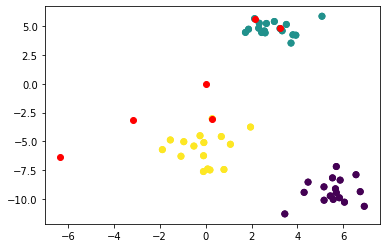

In [24]:
# first approache
def squared_diff2(data1, data2):
    a = (data1[0] - data2[0]) ** 2 + (data1[1] - data2[1]) ** 2
    return np.sqrt(a)


from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# make blob dataset
x2, y2 = make_blobs(
    n_samples=50, n_features=2, centers=3, cluster_std=1, shuffle=True, random_state=10
)


# initialize k
n_k = 3
ks = [i * np.mean(x2[0]) for i in range(n_k)]
kss = [[ks[0], ks[0]], [ks[1], ks[1]], [ks[2], ks[2]]]

# calculate distance from k to nearest neighbor
dis = []
for i in range(len(x2)):
    a = squared_diff2(kss[0], x2[i])
    b = squared_diff2(kss[1], x2[i])
    c = squared_diff2(kss[2], x2[i])
    dis.append([a, b, c])

print(min(dis[0]), min(dis[1]), min(dis[2]))
n = 2
ki0 = [i[0] for i in kss]
ki1 = [i[1] for i in kss]

plt.scatter(x2[:, 0], x2[:, 1], c=y2)
plt.scatter(ki0, ki1, c="red")


kss = initialer(3, x2)
print(f"initialized point : {kss}")
ki0 = [i[0] for i in kss]
ki1 = [i[1] for i in kss]

plt.scatter(x2[:, 0], x2[:, 1], c=y2)
plt.scatter(ki0, ki1, c="red")
# to do:
# change k1 k2 k3 to nearest neighbor , repeat , --XX if k1 == k2 its Bad XX--


[array([3.37979515, 4.18880872]), array([4.32968132, 5.64396726]), array([ 6.73488595, -9.38994773])]
[[2.739393287434206, 4.624043862049761], [2.739393287434206, 4.624043862049761], [5.583713539929246, -9.644997397463776]]


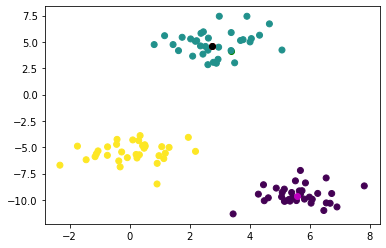

In [26]:
# SECOND APPROACH
x2, y2 = make_blobs(
    n_samples=100, n_features=2, centers=3, cluster_std=1, shuffle=True, random_state=10
)
# ---------------------------------------------------
# random point from data
import random


def initialer(k, data):
    K = []
    selected_index = []
    for i in range(k):
        a = random.randint(0, len(data) - 1)
        selected_index.append(a)
        K.append(data[a])
    return list(K)


# ==================================================================
init_k = initialer(3, x2)
plt.scatter(init_k[0][0], init_k[0][1], c="g")
print(init_k)


def centralize(ik, data, thresh):
    inds = []
    dist = []
    for i, j in enumerate(range(len(data))):
        a0 = squared_diff2(ik, data[i])
        dist.append(a0)
        inds.append(j)
    c = sorted(dist)[:thresh]  # seperate 'thresh number' of nearest neighbor
    cc = [dist.index(i) for i in c]
    sdata = []
    for i in range(len(cc)):
        sel_data = data[cc[i]]
        sdata.append(sel_data)
    sdata = np.array(sdata)
    t = [sdata[:, 0].mean(), sdata[:, 1].mean()]

    return t


oo = 10
while oo > 0:
    init_k[0] = centralize(init_k[0], x2, 30)
    oo -= 1
oo = 10
while oo > 0:
    init_k[1] = centralize(init_k[1], x2, 30)
    oo -= 1
oo = 10
while oo > 0:
    init_k[2] = centralize(init_k[2], x2, 30)
    oo -= 1

plt.scatter(x2[:, 0], x2[:, 1], c=y2)
plt.scatter(init_k[0][0], init_k[0][1], c="r")
plt.scatter(init_k[1][0], init_k[1][1], c="k")
plt.scatter(init_k[2][0], init_k[2][1], c="m")
print(init_k)
# ------------------------- ------------------------- -------------------------


array([[-6.04098578,  5.06798706],
       [ 5.49855163, -9.40880959],
       [ 2.79419702,  4.79694276],
       [ 0.348301  , -5.45307298]])

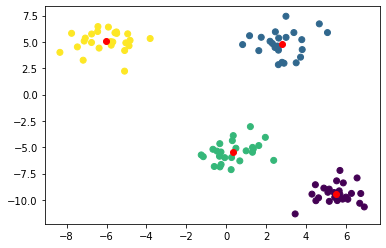

In [38]:
# third APPROACH
import copy
from sklearn.datasets import make_blobs

x2, y2 = make_blobs(
    n_samples=100, n_features=2, centers=4, cluster_std=1, shuffle=True, random_state=10
)
# ---------------------------------------------------
# random point from data
import random


class KMEANS:
    def __init__(self, k, data):
        self.k = k
        self.data = data

    def initialer(self):
        K = []
        selected_index = []
        for i in range(self.k):
            a = random.randint(0, len(self.data) - 1)
            selected_index.append(a)
            K.append(self.data[a])
        return list(K)

    def find_near_index(self, kk, thresh):
        dist = []
        for i in range(len(self.data)):
            a0 = squared_diff2(kk, self.data[i])
            dist.append(a0)
        c = sorted(dist)[:thresh]
        cc = [dist.index(i) for i in c]
        return cc

    def kmeans(self, O):
        init_k = self.initialer()
        self.dddd = copy.copy(self.data)
        thresh = int(len(self.data) / self.k)
        while O > 0:
            indexes = []
            sindex = []
            for i in range(self.k):
                a = self.find_near_index(init_k[i], thresh)
                indexes.append(a) 
            for i in range(0, len(indexes)):   # 2
                sdata = []
                for j in indexes[i]:
                    select = self.data[j]
                    sdata.append(select)
                    sindex.append(j)
                sdata = np.array(sdata)

                init_k[i] = [sdata[:, 0].mean(), sdata[:, 1].mean()]
            sindex = set(sorted(sindex))

            for i in range(len(init_k)):
                for j in range(i, len(init_k)):
                    init_k = np.array(init_k)
                    check = (init_k[i] == init_k[j]).all()
                    if i == j:
                        continue
                    elif check:
                        # print(f'oh this is gone wrong in index {i} and {j}')
                        a = random.randint(0, len(self.data) - 1)
                        init_k[i] = self.data[a]
                        O += 10

            O -= 1
        plt.scatter(x2[:, 0], x2[:, 1], c=y2)

        for i in range(0, self.k):
            plt.scatter(init_k[i][0], init_k[i][1], c="r")

        return np.array(init_k)


a = KMEANS(4, x2)
a.kmeans(100)

# - - TO do - -
# make it faster, change break of final while loop with init_k(pre) == init_k(now) 



# ensemble algorithms

```
bagging 
boosting
stacking
```


